Jupyter notebook shortcuts
    
https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/

### 1. Load CIFAR-10 Database

In [29]:
import keras
from keras.datasets import cifar10

# load the pre-shuffled train and test data
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

### 2. Visualize the first 24 Training images

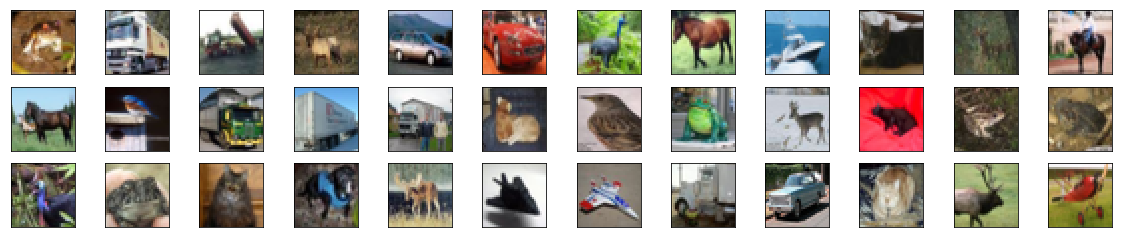

In [30]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig=plt.figure(figsize=(20,4))
for i in range(36):
    ax=fig.add_subplot(3,12, i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(x_train[i]))
    

### 3. Rescale the images by dividing Every  image by 255

In [31]:
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255

### 4.Break Dataset into Training,Testing and Validation sets

In [32]:
from keras.utils import np_utils

#one-hot encode the lables

num_classes=len(np.unique(y_train))
y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

#break training set into training and validation sets
(x_train,x_valid)=x_train[5000:],x_train[:5000]
(y_train,y_valid)=y_train[5000:],y_train[:5000]

#print shape of training set
print('x_train shape:',x_train.shape)

#print number of training ,validation , and test images
print(x_train.shape[0],'train samples')
print(x_test.shape[0],'test samples')
print(x_valid.shape[0],'validation samples')


#print number of training ,validation , and test labels
print(y_train.shape[0],'train labels')
print(y_test.shape[0],'test labels')
print(y_valid.shape[0],'validation labels')



('x_train shape:', (45000, 32, 32, 3))
(45000, 'train samples')
(10000, 'test samples')
(5000, 'validation samples')
(45000, 'train labels')
(10000, 'test labels')
(5000, 'validation labels')


### 5.Define the Model Architecture

In [33]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten

#define the model

model=Sequential()
model.add(Flatten(input_shape=x_train.shape[1:]))
model.add(Dense(1000,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes,activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_22 (Dense)             (None, 1000)              3073000   
_________________________________________________________________
dropout_15 (Dropout)         (None, 1000)              0         
_________________________________________________________________
dense_23 (Dense)             (None, 512)               512512    
_________________________________________________________________
dropout_16 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 10)                5130      
Total params: 3,590,642.0
Trainable params: 3,590,642.0
Non-trainable params: 0.0
____________________________________________________________

### 6.Compile the Model

In [36]:
# Compile the model

model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

### 7.Train the Model

In [37]:
from keras.callbacks import ModelCheckpoint

#train the model
checkpointer = ModelCheckpoint(filepath='MLP.weights.best.hdf5',verbose=1,save_best_only=True)
hist=model.fit(x_train,y_train,batch_size=32,epochs=20,
              validation_data=(x_valid,y_valid),callbacks=[checkpointer],
              verbose=2,shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/20
Epoch 00000: val_loss improved from inf to 1.84555, saving model to MLP.weights.best.hdf5
55s - loss: 1.7731 - acc: 0.3729 - val_loss: 1.8455 - val_acc: 0.3620
Epoch 2/20
Epoch 00001: val_loss improved from 1.84555 to 1.72310, saving model to MLP.weights.best.hdf5
55s - loss: 1.7755 - acc: 0.3693 - val_loss: 1.7231 - val_acc: 0.3962
Epoch 3/20
Epoch 00002: val_loss improved from 1.72310 to 1.69905, saving model to MLP.weights.best.hdf5
56s - loss: 1.7709 - acc: 0.3736 - val_loss: 1.6991 - val_acc: 0.3852
Epoch 4/20
Epoch 00003: val_loss did not improve
57s - loss: 1.7711 - acc: 0.3729 - val_loss: 1.7397 - val_acc: 0.3808
Epoch 5/20
Epoch 00004: val_loss did not improve
50s - loss: 1.7744 - acc: 0.3682 - val_loss: 1.7230 - val_acc: 0.3768
Epoch 6/20
Epoch 00005: val_loss did not improve
49s - loss: 1.7779 - acc: 0.3737 - val_loss: 1.7131 - val_acc: 0.3930
Epoch 7/20
Epoch 00006: val_loss did not improve
50s - loss: 1.7766 - acc

### 8.Load the Model with the Best Classification  Accuracy on the Validation Set

In [38]:
#load the weights that yielded the best validation accuracy

model.load_weights('MLP.weights.best.hdf5')

### 9.Calculate Classification Accuracy on the Test Set

In [ ]:
#evaluate and print test accuracy

score=model.evaluate(x_test,y_test,verbose=0)
print('\n','Test accuracy',score[1])